In [12]:
import matplotlib.pyplot as plt
import numpy as np


[-0.02+0.00785398j -0.02+0.00785398j -0.01+0.00785398j  0.00+0.00785398j
  0.01+0.00785398j  0.02+0.00785398j  0.03+0.00785398j  0.04+0.00785398j
  0.05+0.00785398j  0.06+0.00785398j  0.07+0.00785398j  0.08+0.00785398j
  0.08+0.00785398j  0.09+0.00785398j  0.10+0.00785398j  0.11+0.00785398j
  0.12+0.00785398j  0.13+0.00785398j  0.14+0.00785398j  0.15+0.00785398j
  0.16+0.00785398j  0.17+0.00785398j  0.18+0.00785398j]


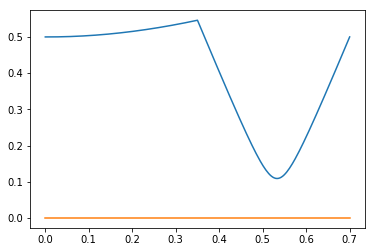

In [83]:
gauss_waist=    lambda q, wl: np.sqrt(q.imag*wl/np.pi)*np.sqrt(1+(q.real/q.imag)**2)
gauss_travel=   lambda q, z: np.append(q, q[-1]+z)
gauss_addlens = lambda q, f: np.append(q[:-1],[q[-1]/(-q[-1]/f+1)])



# Start parameter
z0=5E-3
w0=500E-6
wl=1E-6
zr=w0**2*np.pi/wl
q=-z0+1.j*zr

#travel
x=np.array([0])
z=np.linspace(0,350E-3,110)

beam=gauss_travel(np.array([q]),z)
x=np.append(x,z+x[-1])
beam=gauss_addlens(beam,175E-3)

beam=gauss_travel(beam,z)
x=np.append(x,z+x[-1])

print(beam2)

plt.plot(x,gauss_waist(beam,wl)*1000)
plt.plot(x,x*0)
plt.show()


In [173]:
#Beam functions
# A beam is defined 2d [[x0,q0],[x1,q1]]
beam_travel = lambda beam, z: np.append(beam,[beam[-1]+z],axis=0)
beam_addlens = lambda beam, f:np.append(beam[:-1],np.array([[beam[-1][0],beam[-1][1]/(-beam[-1][1]/f+1)]]),axis=0) 
def beam_linspace (beam, dx):
    x=beam.T[0]        #xwerte
    q=beam.T[1]        #q werte
    dists=x[1:]-x[:-1] #distanzen
    dists=dists.real
    newx=np.array([])
    newq=np.array([])
    for n,d in enumerate(dists):
        z=np.arange(0,d,dx)
        
        newx=np.append(newx,x[n]+z)
        newq=np.append(newq,gauss_travel(np.array([q[n]]),z)[1:])
    newbeam=np.array([newx,newq]).T
    return newbeam
def beam_plot(beam,wl):
    beam2=beam_linspace(beam,10E-3)

    plt.plot(beam2.T[0].real,gauss_waist(beam2.T[1],wl)*1000,color='blue')
    x=beam2.T[0].real
    plt.plot(x,x*0)
    for pos in beam[:-1]: #calculate focii
        z0=pos[0].real-pos[1].real
        zr=pos[1].imag
        w0=np.sqrt(zr*wl/np.pi)
        plt.plot([z0.real,z0.real],[0,w0*1000],color='red')
    for pos in beam[1:-1]:    #Print segment lines
        plt.plot([pos[0].real,pos[0].real],[0,gauss_waist(pos[1],wl)*1000],color='black')
    plt.xlabel('z [m]')
    plt.ylabel('w [mm]')
        
        



(70,)


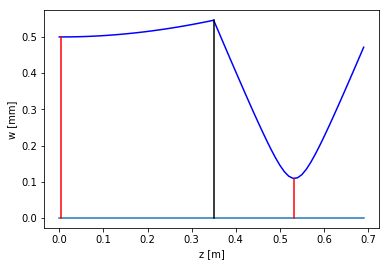

In [174]:
# ------------- Example Usage -------------------------
# Start parameter
z0=5E-3
w0=500E-6
wl=1E-6
zr=w0**2*np.pi/wl
q=-z0+1.j*zr


# add elements 
beam=np.array([[0,q]])
beam=beam_travel(beam,350E-3)
beam=beam_addlens(beam,175E-3)
beam=beam_travel(beam,350E-3)
#beam2=beam_linspace(beam,10E-3)  # fill beam with intermediate values for plotting

beam_plot(beam,wl)
print(beam2.T[1].shape)
#plt.plot(beam2.T[0].real,gauss_waist(beam2.T[1],wl)*1000)
plt.show()

(70,)


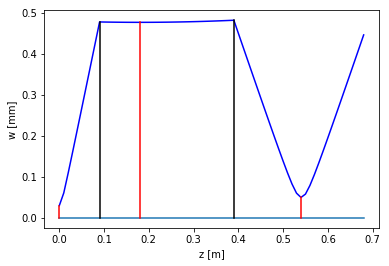

In [176]:
# ------------- Example Usage -------------------------
# Start parameter
z0=0E-3
w0=30E-6
wl=500E-9
zr=w0**2*np.pi/wl
q=-z0+1.j*zr


# add elements 
beam=np.array([[0,q]])
beam=beam_travel(beam,90E-3)
beam=beam_addlens(beam,90E-3)
beam=beam_travel(beam,300E-3)
beam=beam_addlens(beam,150E-3)
beam=beam_travel(beam,300E-3)
#beam2=beam_linspace(beam,10E-3)  # fill beam with intermediate values for plotting

beam_plot(beam,wl)
print(beam2.T[1].shape)
#plt.plot(beam2.T[0].real,gauss_waist(beam2.T[1],wl)*1000)
plt.show()